<a href="https://colab.research.google.com/github/metxebeste/Regresioa_logistikoa/blob/develop/Regresioa_logistikoa_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     Pclass  Sex        Age  SibSp  ...     Fare  Embarked_C  Embarked_Q  Embarked_S
0         3    0  22.000000      1  ...   7.2500           0           0           1
1         1    1  38.000000      1  ...  71.2833           1           0           0
2         3    1  26.000000      0  ...   7.9250           0           0           1
3         1    1  35.000000      1  ...  53.1000           0           0           1
4         3    0  35.000000      0  ...   8.0500           0           0           1
..      ...  ...        ...    ...  ...      ...         ...         ...         ...
886       2    0  27.000000      0  ...  13.0000           0           0           1
887       1    1  19.000000      0  ...  30.0000           0           0           1
888       3    1  29.699118      1  ...  23.4500           0           0           1
889       1    0  26.000000      0  ...  30.0000           1           0           0
890       3    0  32.000000      0  ...   7.7500           0     

Text(0.5, 15.0, 'Predicted')

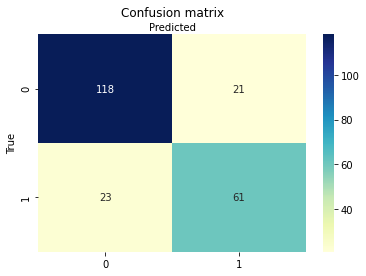

In [ ]:
# Import required libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Read the CSV file :
titanic = pd.read_csv('https://raw.githubusercontent.com/metxebeste/Regresioa_logistikoa/develop/titanic_train.csv')

# Drop features that do not seem to add any value to our model
titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Create categorical dummies for the embarkment ports
ports = pd.get_dummies(titanic.Embarked, prefix='Embarked')
ports.head()
titanic = titanic.join(ports)
titanic.drop(['Embarked'], axis=1, inplace=True)

# Transform gender names to binaries
titanic.Sex = titanic.Sex.map({'male': 0, 'female': 1})

# Replace missing values
titanic[pd.isnull(titanic).any(axis=1)]
titanic.Age.fillna(titanic.Age.mean(), inplace=True)

# Train and Test split
y = titanic.Survived.copy()
X = titanic.drop(['Survived'], axis=1)
print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = pd.Series(model.predict(X_test))
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']
z.head()

# Prezisioaren inguruko datuak kalkulatu eta erakutsi
print("")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("")

# A nice way to visualize the results of the model is by making use of a confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

https://towardsdatascience.com/python-scikit-learn-logistic-regression-classification-eb9c8de8938d